In [1]:
# Basic Libraries
%matplotlib inline


import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from matplotlib import style

plt.rcParams['figure.figsize'] = (10, 6)
style.use('ggplot')
sb.set() # set the default Seaborn style for graphics



from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import brewer
from bokeh.models.tools import HoverTool
from bokeh.models.sources import ColumnDataSource

from collections import Counter


In [2]:
raw_data0=pd.read_csv('match_kill_match_stats_0.csv')# core data 1
raw_data1=pd.read_csv('match_kill_match_stats_1.csv')# core data 2
raw_data2=pd.read_csv('match_kill_match_stats_2.csv')# core data 3
raw_data3=pd.read_csv('match_kill_match_stats_3.csv')# core data 4
raw_data4=pd.read_csv('match_kill_match_stats_4.csv')# core data 5
raw_data5=pd.read_csv('match_kill_match_stats_5.csv')# core data 6
raw_data6=pd.read_csv('match_kill_match_stats_6.csv')# core data 7
raw_data7=pd.read_csv('match_kill_match_stats_7.csv')# core data 8
raw_data8=pd.read_csv('match_kill_match_stats_8.csv')# core data 9
raw_data9=pd.read_csv('match_kill_match_stats_9.csv')# core data 10
raw_data10=pd.read_csv('match_kill_match_stats_10.csv')# core data 11
raw_data11=pd.read_csv('match_kill_match_stats_11.csv')# core data 12

raw_data=pd.concat([raw_data0, raw_data1, raw_data2, raw_data3, raw_data4, raw_data5, raw_data6, raw_data7, raw_data8, raw_data9, raw_data10, raw_data11])





In [3]:
print(raw_data['map'].value_counts())

Savage_Main        72747
Desert_Main        53834
Baltic_Main        42000
Erangel_Main       28283
DihorOtok_Main     25956
Tiger_Main         24100
Summerland_Main     7475
Heaven_Main          494
Chimera_Main         307
Name: map, dtype: int64


In [4]:
raw_data.loc[raw_data['map'].isin(["Baltic_Main", "Erangel_Main"])]
raw_erangel = raw_data.drop('map', axis = 1)


Some people are killed at position (0, 0) which is impossible. Probably due to connection error ect.

In [99]:
raw_erangel = raw_erangel[raw_erangel['killer_position_x'] !=0]
raw_erangel = raw_erangel[raw_erangel['victim_position_x'] !=0]
raw_erangel

In [143]:
top_10_raw = raw_erangel.dropna()
top_10_bool = top_10_raw.loc[(top_10_raw.time < 200)]
top_10_bool.loc[top_10_bool['killer_placement'] < 10, 'killer_placement'] = 1
top_10_bool.loc[top_10_bool['killer_placement'] >= 10, 'killer_placement'] = 0
top_10_bool


C:\Users\swrgo\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,match_id,time,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,victim_name,victim_placement,victim_position_x,victim_position_y
1,JwQTpc85CVDzAo7j_aZ9pcThsIdW_TyNjmM9iws00fgnQQ...,158,Hit by Car,Mr_Yokedici,0.0,383498.84375,459476.062500,MigUgra,58.0,383144.90625,459264.406250
3,JwQTpc85CVDzAo7j_aZ9pcThsIdW_TyNjmM9iws00fgnQQ...,160,Grenade,Yakur0,0.0,156772.21875,462198.468750,Yakur0,57.0,156772.21875,462198.468750
4,JwQTpc85CVDzAo7j_aZ9pcThsIdW_TyNjmM9iws00fgnQQ...,94,Mini 14,Doyoulikeit,0.0,657017.81250,357662.031250,Man1aCStyle,62.0,656741.43750,357605.531250
7,JwQTpc85CVDzAo7j_aZ9pcThsIdW_TyNjmM9iws00fgnQQ...,184,death.WeapMosinNagant_C,Leoo121221,0.0,468659.75000,312414.968750,Pedrowesk,56.0,467312.84375,317084.625000
11,JwQTpc85CVDzAo7j_aZ9pcThsIdW_TyNjmM9iws00fgnQQ...,81,M416,MUHAMMED65,0.0,425344.25000,325548.156250,RICORITSCH,63.0,436342.87500,332353.875000
...,...,...,...,...,...,...,...,...,...,...,...
3830,JwQTpc85CVDzAo7j_aZ9pdurFKxBIZ57W58eFT_EDqxXBb...,158,AKM,SynRJ,0.0,502903.09375,210057.750000,TreaLoes,27.0,502074.56250,209097.515625
3831,JwQTpc85CVDzAo7j_aZ9pdurFKxBIZ57W58eFT_EDqxXBb...,81,Sickle,WhiteDeath93,0.0,236286.09375,321210.218750,oneloo,22.0,236304.59375,321289.500000
3848,JwQTpc85CVDzAo7j_aZ9pdurFKxBIZ57W58eFT_EDqxXBb...,93,AKM,Sch1mansk1,0.0,143150.75000,224279.640625,SalaM10,21.0,142761.46875,223938.312500
3849,JwQTpc85CVDzAo7j_aZ9pdurFKxBIZ57W58eFT_EDqxXBb...,198,Down and Out,The__Zohan,0.0,438854.43750,315959.781250,Sockeneddy,26.0,438884.93750,315331.343750


In [144]:
# Response
placement = pd.DataFrame(top_10_bool['killer_placement'])

# Predictor
coordinate = pd.DataFrame(top_10_bool[['killer_position_x', 'killer_position_y']])
coordinate

,killer_position_x,killer_position_y
1,383498.84375,459476.062500
3,156772.21875,462198.468750
4,657017.81250,357662.031250
7,468659.75000,312414.968750
11,425344.25000,325548.156250
...,...,...
3830,502903.09375,210057.750000
3831,236286.09375,321210.218750
3848,143150.75000,224279.640625
3849,438854.43750,315959.781250


In [145]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
coordinate_train, coordinate_test, placement_train, placement_test = train_test_split(coordinate, placement, test_size = 0.25)

# Check the sample sizes
print("Train Set :", placement_train.shape, coordinate_train.shape)
print("Test Set  :", placement_test.shape, coordinate_test.shape)

Train Set : (42234, 1) (42234, 2)
Test Set  : (14079, 1) (14079, 2)


In [146]:
y_test = placement_test
y_train = placement_train
X_test = coordinate_test
X_train = coordinate_train

In [150]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'killer_position_x <= 153075.172\ngini = 0.328\nsamples = 42234\nvalue = [33487, 8747]\nclass = Looser'),
 Text(167.4, 326.16, 'killer_position_y <= 248433.75\ngini = 0.414\nsamples = 5753\nvalue = [4072, 1681]\nclass = Looser'),
 Text(83.7, 108.72000000000003, 'gini = 0.45\nsamples = 3448\nvalue = [2270, 1178]\nclass = Looser'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.341\nsamples = 2305\nvalue = [1802, 503]\nclass = Looser'),
 Text(502.20000000000005, 326.16, 'killer_position_x <= 215278.898\ngini = 0.312\nsamples = 36481\nvalue = [29415, 7066]\nclass = Looser'),
 Text(418.5, 108.72000000000003, 'gini = 0.269\nsamples = 7785\nvalue = [6539, 1246]\nclass = Looser'),
 Text(585.9, 108.72000000000003, 'gini = 0.323\nsamples = 28696\nvalue = [22876, 5820]\nclass = Looser')]

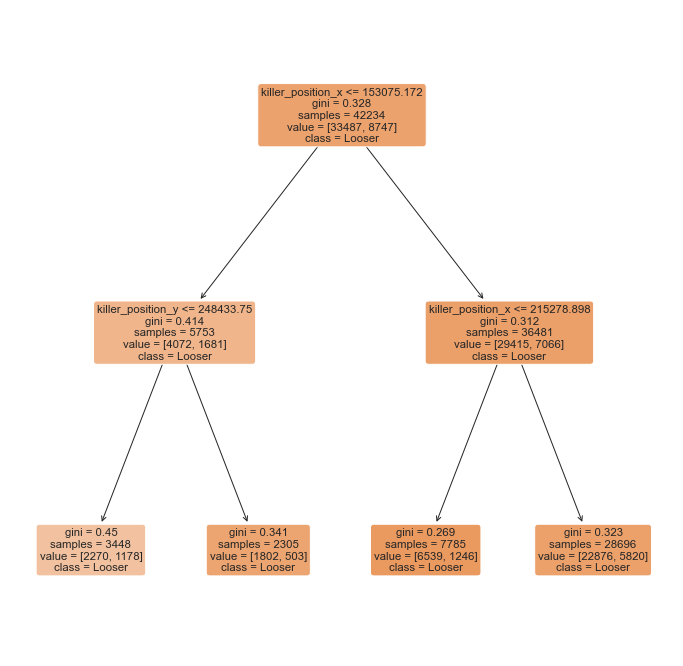

In [151]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Looser","Top10"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.792891982762703

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7994175722707578



<AxesSubplot:>

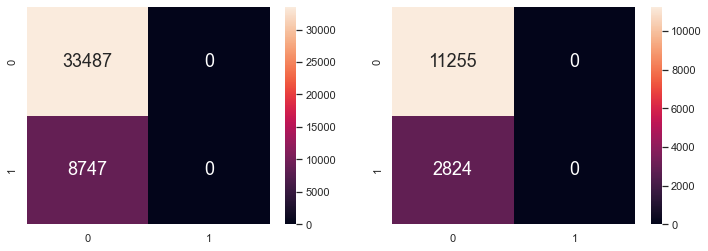

In [152]:
from sklearn.metrics import confusion_matrix

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [ ]:
/


#

















#

In [73]:
x_diffs = raw_data_erangel['killer_position_x'] - raw_data_erangel['victim_position_x']
y_diffs = raw_data_erangel['killer_position_y'] - raw_data_erangel['victim_position_y']
sq_diffs = x_diffs ** 2 + y_diffs ** 2
dists = np.sqrt(sq_diffs)
log_dists = np.log10(1 + dists)
raw_data_erangel['log_dist'] = log_dists

top_weapons = list(raw_data_erangel[raw_data_erangel['killed_by'] != 'Down and Out'].groupby('killed_by').size().sort_values(ascending=False)[:10].index)
top_weapon_kills = raw_data_erangel[np.in1d(raw_data_erangel['killed_by'], top_weapons)].copy()
top_weapon_kills['bin'] = pd.cut(top_weapon_kills['log_dist'], np.arange(0, 6.2, 0.2), include_lowest=True, labels=False)
top_weapon_kills_wide = top_weapon_kills.groupby(['killed_by', 'bin']).size().unstack(fill_value=0).transpose()

In [81]:
def  stacked(df):
    df_top = df.cumsum(axis=1)
    df_bottom = df_top.shift(axis=1).fillna(0)[::-1]
    df_stack = pd.concat([df_bottom, df_top], ignore_index=True)
    return df_stack

hover = HoverTool(
    tooltips=[
            ("index", "$index"),
            ("weapon", "@weapon"),
            ("(x,y)", "($x, $y)")
        ],
    point_policy='follow_mouse'
    )

areas = stacked(top_weapon_kills_wide)

colors = brewer['Spectral'][areas.shape[1]]
x2 = np.hstack((top_weapon_kills_wide.index[::-1],
                top_weapon_kills_wide.index)) / 5

TOOLS="pan,wheel_zoom,box_zoom,reset"
output_notebook()
p = figure(x_range=(1, 5), y_range=(0, 22000), tools=[TOOLS, hover], plot_width=800)
p.grid.minor_grid_line_color = '#eeeeee'

source = ColumnDataSource(data={
    'x': [x2] * areas.shape[1],
    'y': [areas[c].values for c in areas],
    'weapon': list(top_weapon_kills_wide.columns),
    'color': colors
})

p.patches('x', 'y', source=source, legend="weapon",
          color='color', alpha=0.8, line_color=None)
p.title.text = "Distribution of Kill Distance per Weapon"
p.xaxis.axis_label = "log10 of kill distance"
p.yaxis.axis_label = "number of kills"

show(p)

Loading BokehJS ...